<h1 style="color:rgb(0,120,170)">Expectation Maximization</h1>

<h2 style="color:rgb(0,120,170)">Task 1: Proof details for EM-algorithm</h2>

This task is meant to foster your understanding concerning some theoretical insights into the EM algorithm.
As you have seen in the briefing session, when doing EM, you improve the log likelihood of the data $\mathbf{x}$, i.e. $\ln p(\mathbf{x}\!\mid\!\mathbf{\Theta})$, by introducing a distribution $Q(\mathbf{u}\!\mid\!\mathbf{x})$ on hidden variables $\mathbf{u}$. Then, instead of maximizing the log likelihood directly, you maximize a lower bound which is obtained through Jensen's inequality. We have:

\begin{align}
 \ln(p(\mathbf{x})) \geq \int_U Q(\mathbf{u}\!\mid\!\mathbf{x})\, \ln \frac{p(\mathbf{x}, \mathbf{u})}{Q(\mathbf{u}\!\mid\!\mathbf{x})}\ \textrm{d}\mathbf{u}. \quad (1)
\end{align}

<h3 style="color:rgb(0,120,170)">Task:</h3>

Confirm that after each E-step in the EM algorithm, this lower bound is reached with equality ("the bound is tight").

<h3 style="color:rgb(210,90,80)">Calculation:</h3>

$$\ln(p(\mathbf{x})) \geq \int_U Q(\mathbf{u}\!\mid\!\mathbf{x})\, \ln \frac{p(\mathbf{x}, \mathbf{u})}{Q(\mathbf{u}\!\mid\!\mathbf{x})}\ \textrm{d}\mathbf{u}. \quad $$

$$\ln(p(\mathbf{x})) \geq \int_U \ln p(x) Q(\mathbf{u}\!\mid\!\mathbf{x})\textrm{d}\mathbf{u} + \int_U \ln \frac{p(\mathbf{u}\!\mid\!\mathbf{x})}{Q(\mathbf{u}\!\mid\!\mathbf{x})} Q(\mathbf{u}\!\mid\!\mathbf{x})\textrm{d}\mathbf{u} $$

$$\ln(p(\mathbf{x})) \geq \ln(p(\mathbf{x})) - \int_U \ln \frac{Q(\mathbf{u}\!\mid\!\mathbf{x})}{p(\mathbf{u}\!\mid\!\mathbf{x})} Q(\mathbf{u}\!\mid\!\mathbf{x})\textrm{d}\mathbf{u} $$

Equality between lower bound and log-likelihood holds(according to Jensen's inequality) if $$E_Q \left(\ln \frac{p(\mathbf{x}, \mathbf{u})}{Q(\mathbf{u} \!\mid\!\mathbf{x})} \right) =  \int_U Q(\mathbf{u}\!\mid\!\mathbf{x})\, \ln \frac{p(\mathbf{x}, \mathbf{u})}{Q(\mathbf{u}\!\mid\!\mathbf{x})}\ \textrm{d}\mathbf{u}. \quad = 0$$

So in order to maximize lower bound(make it tight) we have to set $Q(\mathbf{u}\!\mid\!\mathbf{x})$ as 

$$ Q(\mathbf{u_i}\!\mid\!\mathbf{x_i}) =  \frac {p(x_i,u_i,\theta)}{\sum_u p(x_i,u_i,\theta)}  = p(u_i \mid x_i, \theta)$$ 

As as result we will get $ \ln1 = 0$ , which shows that bound is tight. 

<h2 style="color:rgb(0,120,170)"> Task 2: Examples of Mixture models </h2>

In the slides, we discussed the procedure of obtaining well-suited parameters for a mixture of Gaussians model, thereby using the EM-algorithm. Now we want to apply these techniques to derive update formulas for a similar (and even easier) tasks in the discrete setting, namely the Mixture of (one-dimensional) Poisson distributios and Bernoulli distributions. Let us start recalling the general notion of a mixture model: a mixture of $K$ distributions $p_k(x;\theta_k)$ with $k=1,...,K$ can be written as:
$
p(x) = \sum_{k=1}^K\alpha_k p_k(x;\theta_k),
$
where $\sum_{k=1}^K\alpha_k = 1$ and all $\alpha_k > 0$. If the data are assumed to be drawn i.i.d. from $p(x)$, the likelihood function has the form
\begin{equation}
\ln \mathcal{L}(\Theta \!\mid\! x_1, ..., x_n) = \ln \prod_{i=1}^n p(x_i) = \sum_{i=1}^n \ln\Big(\sum_{k=1}^K \alpha_k p(x_i;\theta_k)\Big)
\end{equation}
where $\Theta = \{ \alpha_1, ..., \alpha_K, \theta_1, ..., \theta_K \}$.

<h3 style="color:rgb(0,120,170)">Task:</h3>

In a similar way as in the slides apply the EM-algorithm, specifically you are asked to derive update formulas for $r_{ik}$, $\alpha_k$, $\lambda_k$ and $\mu_k$ (the corresponding parameters) to be used in the E- and M-steps for:
* A mixture of Poisson distributions $P(x;\lambda) = \lambda^{x}e^{-\lambda}\frac{1}{x!}$. Keep in mind that this is a discrete distribution, i.e. $x \in \mathbb{N} \cup \{ 0 \}$. Moreover, $\lambda>0$.
* A mixture of Bernoulli distributions $P(x; \mu)= \mu ^x (1-\mu)^{1-x}$. Keep in mind that this is a discrete distribution with binary outputs, such that in our case $x \in  \{ 0,1 \}$. Moreover $\mu \in [0,1]$.

Note that most of the formulas from the slides for the Mixture of Gaussians problem can be reused, as they are not specific to the Gaussian distribution, but for a Mixture Model in general. These calculations shouldn't be reproduced again, just use the corresponding results!

<h3 style="color:rgb(210,90,80)">Calculation:</h3> 

**1. Poisson Distribution:**

$$\ln p(x_i;\lambda_k) = \ln \frac{\lambda_k^{x_i}}{x_i!} e^{-\lambda_k} = \ln \lambda_k^{x_i} - \ln x_i! - \lambda_k = x_i\ln \lambda_k- \ln x_i! - \lambda_k$$

$$\frac{d}{d\lambda_k} = \frac{x_i}{\lambda_k} - 1 = 0$$

$$ \lambda_k = x_i $$

substituting derivative of $\ln p(x_i;\lambda_k)$ into equation $$ \frac{d\ln \mathcal{L}}{d\lambda_k} = \sum_i^n p\left(u_i = k\mid\ x_i\right) \frac{d\ln p(x_i,\lambda_k)}{d\lambda_k}$$

we get

$$ \frac{d\ln \mathcal{L}}{d\lambda_k} = \sum_i^n r_{ik} \left( \frac{x_i}{\lambda_k} - 1 \right) = 0$$

$$ \frac{\sum_i^n r_{ik}x_i}{\lambda_k} = \sum_i^n r_{ik}$$

$$ \lambda_k = \frac{\sum_i^n r_{ik}x_i}{\sum_i^n r_{ik}} $$



**2. Bernoulli distribution:**

$$\ln p(x_i;\mu_k) = \ln \mu_k^{x_i}(1-\mu_k)^{1-x_i}  = \ln \mu_k^{x_i} + \ln (1-\mu_k)^{1-x_i} = x_i\ln \mu_k + (1-x_i)\ln(1-\mu_k)$$

$$\frac{d\ln \mathcal{L}}{d\mu_k} = \frac{x_i}{\mu_k} - \frac{1-x_i}{1-\mu_k} = 0$$


$$x_i(1-\mu_k) + \mu_k(1-x_i) = 0$$

$$\mu_k = x_i$$

substituting derivative of $\ln p(x_i;\mu_k)$ into equation $$ \frac{d\ln \mathcal{L}}{d\mu_k} = \sum_i^n p\left(u_i = k\mid\ x_i\right) \frac{d\ln p(x_i,\mu_k)}{d\mu_k}$$

we get 

$$ \frac{d\ln \mathcal{L}}{d\mu_k} = \sum_i^n r_{ik} \left( \frac{x_i}{\mu_k} - \frac{1-x_i}{1-\mu_k} \right) = 0$$

$$ \sum_i^n r_{ik}x_i = \sum_i^n r_{ik}\mu_k$$

$$ \mu_k = \frac{\sum_i^n r_{ik}x_i}{\sum_i^n r_{ik}} $$


$\alpha_k = \frac{1}{n}\sum_{i=1}^n p(u_i\! =\! k \!\mid\! x_i)$ and $r_{ik} =\frac{\alpha_k\, p(x_i;\theta_k)}{\sum_{l=1}^K\alpha_l\, p(x_i;\theta_l)}$ are the same for both distributions, because:

1. Optimization for $\alpha_k$ cosists of finding a lagrangian of log-likelihood function w.r.t $\alpha_k$. Taking derivative of log-likelihood w.r.t $\alpha_k$ means, that probability distribution is not involved in this calculation. Hence, optimization of $\alpha_k$ is independent of distribution. As a result, the general formula will be the same for all distributions.

2. Given $\alpha_k$ and $\lambda_k$ we use Bayes' Theorem for computing $r_{ik}$. Again, this calculation doesn't involve any transformation of the probability distribution. Hence, the general formula for $r_{ik}$ will be the same for any distribution.

<h2 style="color:rgb(0,120,170)"> Task 3: Implementation of Mixture of Poissons algorithm </h2>


Now we intend to write a program that estimates all the parameters of a Mixture of Poissons via an EM algorithm by using the results from the previous task. If you have done that correctly, you should have obtained $\alpha_k = \frac{1}{n}\sum_{i=1}^n p(u_i\! =\! k \!\mid\! x_i)$, $ \lambda_k = \frac{\sum_{i=1}^nx_i\, p(u_i = k \mid x_i)}{\sum_{i=1}^np(u_i = k \mid x_i)}$, and $r_{ik} =\frac{\alpha_k\, p(x_i;\theta_k)}{\sum_{l=1}^K\alpha_l\, p(x_i;\theta_l)}$. (Obviously, it's not enough for the previous task to just write down these solutions, of course you have to provide arguments.) Let us start with reading in and visualizing the data set that you have to use. Then proceed with doing the following tasks:

<h3 style="color:rgb(0,120,170)">Task:</h3>

* Write functions that implement the E-step, M-step and the log-likelihoods.
* Then iterate until the differences between the log-likelihoods before and after some iteration step is less than $10^{-5}$.
* Let your algorithm run on the data from $\mathsf{cnvdata.csv}$, which we already encoded in the variable data. Start with $K=4$ mixture components, and initialize all four alphas equally. For the initialization of the $\lambda_k$ use $10,50,100$ and $150$. 
* Try further choices of $K$ and run different experiments with different random initializations (at least one). Be careful with exponents and factorials to not run into overflow.

sklearn version: 1.1.2
scipy version: 1.9.2
numpy version: 1.21.5
matplotlib version: 3.5.1


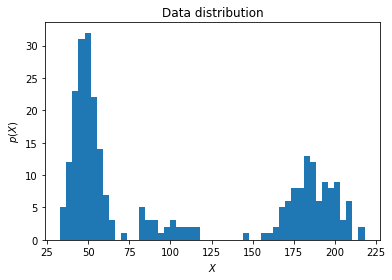

In [1]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

import scipy
import matplotlib
import sklearn
import numpy as np

%matplotlib inline  


print('sklearn version:',sklearn.__version__)
print('scipy version:',scipy.__version__)
print('numpy version:',np.__version__)
print('matplotlib version:',matplotlib.__version__)

data = np.loadtxt(open("cnvdata.csv", "rb"), delimiter=",", skiprows=1)

plt.hist(data,bins=50)
plt.title('Data distribution')
plt.ylabel('$p(X)$')
plt.xlabel('$X$')
plt.show()

<h3 style="color:rgb(208,90,80)">Code</h3>

In [2]:
def m_step(x,R,K):
    alphas = []
    lambdas = []
    distr = []
    for k in range(K):
        
        alphas.append(sum(R[k])/len(R[k]))
        lambdas.append(sum(R[k] * x)/sum(R[k]))
        distr.append(poisson.pmf(x,lambdas[k]))
    
    
    return alphas,lambdas,distr
        
    
def e_step(alphas,distr,K):
    R = []
    denominator = np.dot(alphas,distr)
    for k in range(K):
        R.append((alphas[k] * distr[k])/denominator)
        
        
    return R



def log_likelihood(alphas,distr):

    return np.sum(np.log(np.dot(alphas,distr)))
    
    

    
def EM_algorithm(x,K = 4,lambdas = [10,50,100,150],eps = 10**(-5)):
    
    #initialization
    alphas = [1/K for i in range(K)]
    distr = []
    log_likel = 0
    for k in range(K):
        distr.append(poisson.pmf(x,lambdas[k]))
    
    while True:
        R = e_step(alphas,distr,K)
        alphas,lambdas,distr = m_step(x,R,K)
        LL = log_likelihood(alphas,distr)
        if abs(LL - log_likel) < eps:
            print('Algorithm has converged')
            return alphas,lambdas,LL
        else:
            log_likel = LL


    
    
alp_4,lamb_4,LL_4 = EM_algorithm(data)     

        
            

Algorithm has converged


In [3]:
alp_3,lamb_3,LL_3 = EM_algorithm(data,K = 3,lambdas = [50,100,180])  

Algorithm has converged


<h3 style="color:rgb(0,120,170)">Task:</h3>

* Test your implementation of the four components with the mentioned initializations. Print the corresponding $\alpha$'s, $\lambda$'s and log-likelihoods. Finally, produce a plot that visualizes the original data distribution and the estimated one.

<h3 style="color:rgb(208,90,80)">Code</h3>

In [4]:
################################################

#1.Given setup with K = 4:
print('Given setup with K = 4')
print('Final Log-likelihood:',LL_4)
print('Final Lambdas:',lamb_4)
print('Final alphas:',alp_4)
print('Check for alphas:',sum(alp_4))

Given setup with K = 4
Final Log-likelihood: -1251.019535723605
Final Lambdas: [40.709283975853964, 48.647138476221045, 96.96567354695998, 186.9811367271789]
Final alphas: [3.734188412217063e-09, 0.5449343016662409, 0.09143898647319977, 0.3636267081263711]
Check for alphas: 1.0000000000000002


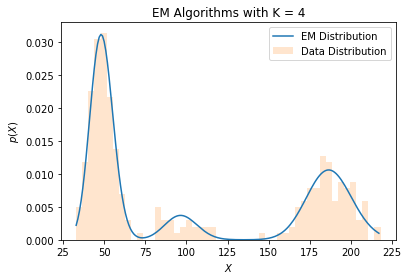

In [5]:
def mix_poisson(x, lambdas,alphas):
    distr = np.zeros_like(x)
    for lamb,alpha in zip(lambdas, alphas):
        distr += alpha * poisson.pmf(x, lamb)
    return distr

grid = np.arange(np.min(data), np.max(data), 1)
plt.plot(grid, mix_poisson(grid,lamb_4,alp_4), label='EM Distribution')

plt.hist(data,bins=50,density = True,alpha = 0.2,label = 'Data Distribution')
plt.title('EM Algorithms with K = 4')
plt.ylabel('$p(X)$')
plt.xlabel('$X$')
plt.legend(loc='upper right')
plt.show()

<h3 style="color:rgb(210,90,80)">Question:</h3>

Based on the plots it looks like, that it might be either 3 or 4 clusters.
When we use EM-algorithm for K = 1, distribution is way of compared to original data distribution.
for K = 2 it misses data near x = 100. For K = 3 and K = 4 there is almost no difference, but LL for K = 3 is a bit better.

I have checked as well K = 5 and K = 6, they look good as well. It means, that with increasing K distribution will predict as good as with K = 3 or 4, but it will assign very low weights to the redundant clusters.

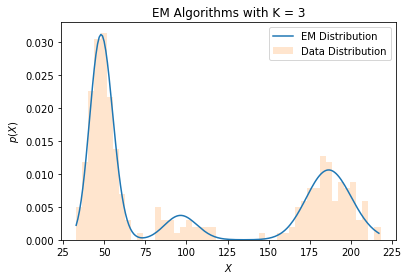

In [6]:
grid = np.arange(np.min(data), np.max(data), 1)
plt.plot(grid, mix_poisson(grid,lamb_3,alp_3), label='EM Distribution')

plt.hist(data,bins=50,density = True,alpha = 0.2,label = 'Data Distribution')
plt.title('EM Algorithms with K = 3')
plt.ylabel('$p(X)$')
plt.xlabel('$X$')
plt.legend(loc='upper right')
plt.show()